## Proposed New Variable for Stock Price Prediction: Sentiment Analysis Scores of News Headlines

---

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import warnings

from alpaca_trade_api import REST
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [2]:
# Initialize the Alpaca API client
api = REST('PKU5LEIDZZV83Y5ENASI', 'nvzOwJpyvr73GTitTDyga0MkI2Qd6RsK4PmhItbu', base_url = 'https://paper-api.alpaca.markets')

# Define file path
file_path1 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\news_headline_MSFT.csv"
file_path2 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\news_headline_NVDA.csv"
file_path3 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\news_headline_TSLA.csv"
file_path4 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\stock_and_news_headline_MSFT.csv"
file_path5 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\stock_and_news_headline_NVDA.csv"
file_path6 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\stock_and_news_headline_TSLA.csv"
file_path7 = r"C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\stock_and_news_headline.csv"

---

### Data Collection

---
1. MSFT Stock and News Headline

In [3]:
# Download historical stock data for MSFT
stock_MSFT = yf.download('MSFT', start = '2015-01-01', end = '2024-10-31', progress = False)

In [4]:
# Fetch news headline data for MSFT
news_headline_MSFT = api.get_news('MSFT', '2015-01-01', '2024-10-31', limit = 35000)

sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...


---
2. NVDA Stock and News Headline

In [5]:
# Download historical stock data for NVDA
stock_NVDA = yf.download('NVDA', start = '2015-01-01', end = '2024-10-31', progress = False)

In [6]:
# Fetch news headline data for NVDA
news_headline_NVDA = api.get_news('NVDA', '2015-01-01', '2024-10-31', limit = 35000)

sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying htt

---
3. TSLA Stock and News Headline

In [7]:
# Download historical stock data for TSLA
stock_TSLA = yf.download('TSLA', start = '2015-01-01', end = '2024-10-31', progress = False)

In [8]:
# Fetch news headline data for TSLA
news_headline_TSLA = api.get_news('TSLA', '2015-01-01', '2024-10-31', limit = 35000)

sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...


sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1beta1/news 3 more time(s)...
sleep 3 seconds and retrying htt

---

### Data Preprocessing

---
1. MSFT Stock

In [9]:
# Reset the index of the DataFrame to make 'Date' a column
stock_MSFT = stock_MSFT.reset_index()

In [10]:
# Create new features
stock_MSFT['Mid'] = (stock_MSFT['High'] + stock_MSFT['Low']) / 2
stock_MSFT['ClosePct'] = (stock_MSFT['Close'] - stock_MSFT['Low']) / (stock_MSFT['High'] - stock_MSFT['Low'])
stock_MSFT['Range'] = stock_MSFT['High'] - stock_MSFT['Low']
stock_MSFT['RangeMa'] = stock_MSFT['Range'].rolling(30).mean()
stock_MSFT['RangeSD'] = stock_MSFT['Range'].rolling(30).std()
stock_MSFT['RangeZscore'] = (stock_MSFT['Range'] - stock_MSFT['RangeMa']) / stock_MSFT['RangeSD']
stock_MSFT['MA10'] = stock_MSFT['Close'].rolling(10).mean()
stock_MSFT['MA30'] = stock_MSFT['Close'].rolling(30).mean()
stock_MSFT['CDivMa10'] = stock_MSFT['Close'] / stock_MSFT['MA10']
stock_MSFT['CDivMa30'] = stock_MSFT['Close'] / stock_MSFT['MA30']
stock_MSFT['MA10Slope'] = stock_MSFT['MA10'].diff()
stock_MSFT['MA30Slope'] = stock_MSFT['MA30'].diff()
stock_MSFT['CPctChg10'] = stock_MSFT['Close'].pct_change(10)
stock_MSFT['CPctChg30'] = stock_MSFT['Close'].pct_change(30)
stock_MSFT['Percent Change'] = stock_MSFT['Adj Close'].pct_change(4).shift(-4)
stock_MSFT['Company'] = 'MSFT'

In [11]:
# Drop rows with any missing values
stock_MSFT = stock_MSFT.dropna()

In [12]:
# Convert to DataFrame
stock_MSFT = pd.DataFrame(stock_MSFT)
stock_MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mid,ClosePct,Range,...,MA10,MA30,CDivMa10,CDivMa30,MA10Slope,MA30Slope,CPctChg10,CPctChg30,Percent Change,Company
30,2015-02-17,43.970001,44.000000,43.189999,43.580002,37.688148,33695700,43.594999,0.481485,0.810001,...,42.618,44.366000,1.022573,0.982284,0.230,-0.106000,0.055717,-0.068007,0.013080,MSFT
31,2015-02-18,43.630001,43.700001,43.389999,43.529999,37.644913,27111700,43.545000,0.451609,0.310001,...,42.811,44.272666,1.016795,0.983225,0.193,-0.093333,0.046394,-0.060436,0.012864,MSFT
32,2015-02-19,43.180000,43.529999,43.049999,43.500000,37.618977,27603400,43.289999,0.937502,0.480000,...,42.977,44.201000,1.012169,0.984141,0.166,-0.071667,0.039675,-0.047098,0.011265,MSFT
33,2015-02-20,43.509998,43.880001,43.290001,43.860001,37.930302,29721100,43.585001,0.966101,0.590000,...,43.118,44.122000,1.017209,0.994062,0.141,-0.079000,0.033216,-0.051265,0.004560,MSFT
34,2015-02-23,43.700001,44.189999,43.650002,44.150002,38.181107,32518800,43.920000,0.925931,0.539997,...,43.292,44.007333,1.019819,1.003242,0.174,-0.114667,0.041028,-0.072284,-0.006795,MSFT


---
2. MSFT News Headline

In [13]:
# Initialize a list to store
news_headline_list_MSFT = []

In [14]:
# Create a dictionary for each news item with headline text and creation date
for news_headline in news_headline_MSFT:
    news_item = {'Date': news_headline.created_at,
                 'News Headline': news_headline.headline}
    news_headline_list_MSFT.append(news_item)

In [15]:
# Format the 'created_at' field to 'YYYY-MM-DD' format
for news_item in news_headline_list_MSFT:
    news_item['Date'] = news_item['Date'].strftime('%Y-%m-%d')

In [16]:
# Convert to DataFrame
news_headline_MSFT = pd.DataFrame(news_headline_list_MSFT)
news_headline_MSFT.head()

,Date,News Headline
0,2024-10-30,Microsoft Q1 Earnings Highlights: 'AI-Driven T...
1,2024-10-30,Microsoft Q1 2025 GAAP EPS $3.30 Beats $3.09 E...
2,2024-10-30,"Market Clubhouse Morning Memo - October 30th, ..."
3,2024-10-30,"AMD Earnings Show Power Of Nvidia Software, AD..."
4,2024-10-16,Under the Radar - The Quiet Risks That Drive M...


In [17]:
# Save to a CSV file
news_headline_MSFT.to_csv(file_path1, index = False)

---
3. NVDA Stock

In [18]:
# Reset the index of the DataFrame to make 'Date' a column
stock_NVDA = stock_NVDA.reset_index()

In [19]:
# Create new features
stock_NVDA['Mid'] = (stock_NVDA['High'] + stock_NVDA['Low']) / 2
stock_NVDA['ClosePct'] = (stock_NVDA['Close'] - stock_NVDA['Low']) / (stock_NVDA['High'] - stock_NVDA['Low'])
stock_NVDA['Range'] = stock_NVDA['High'] - stock_NVDA['Low']
stock_NVDA['RangeMa'] = stock_NVDA['Range'].rolling(30).mean()
stock_NVDA['RangeSD'] = stock_NVDA['Range'].rolling(30).std()
stock_NVDA['RangeZscore'] = (stock_NVDA['Range'] - stock_NVDA['RangeMa']) / stock_NVDA['RangeSD']
stock_NVDA['MA10'] = stock_NVDA['Close'].rolling(10).mean()
stock_NVDA['MA30'] = stock_NVDA['Close'].rolling(30).mean()
stock_NVDA['CDivMa10'] = stock_NVDA['Close'] / stock_NVDA['MA10']
stock_NVDA['CDivMa30'] = stock_NVDA['Close'] / stock_NVDA['MA30']
stock_NVDA['MA10Slope'] = stock_NVDA['MA10'].diff()
stock_NVDA['MA30Slope'] = stock_NVDA['MA30'].diff()
stock_NVDA['CPctChg10'] = stock_NVDA['Close'].pct_change(10)
stock_NVDA['CPctChg30'] = stock_NVDA['Close'].pct_change(30)
stock_NVDA['Percent Change'] = stock_NVDA['Adj Close'].pct_change(4).shift(-4)
stock_NVDA['Company'] = 'NVDA'

In [20]:
# Drop rows with any missing values
stock_NVDA = stock_NVDA.dropna()

In [21]:
# Convert to DataFrame
stock_NVDA = pd.DataFrame(stock_NVDA)
stock_NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mid,ClosePct,Range,...,MA10,MA30,CDivMa10,CDivMa30,MA10Slope,MA30Slope,CPctChg10,CPctChg30,Percent Change,Company
30,2015-02-17,0.55675,0.56225,0.55325,0.5595,0.537183,203340000,0.557750,0.694440,0.00900,...,0.525725,0.505583,1.064245,1.106642,0.006900,0.001875,0.140673,0.111773,-0.009830,NVDA
31,2015-02-18,0.55875,0.55975,0.55200,0.5530,0.530942,170948000,0.555875,0.129030,0.00775,...,0.530750,0.507525,1.041922,1.089601,0.005025,0.001942,0.099950,0.117736,0.012473,NVDA
32,2015-02-19,0.56000,0.56100,0.55200,0.5545,0.532383,169432000,0.556500,0.277777,0.00900,...,0.535800,0.510017,1.034901,1.087219,0.005050,0.002492,0.100198,0.155810,0.002040,NVDA
33,2015-02-20,0.55400,0.55875,0.55000,0.5585,0.536223,157752000,0.554375,0.971431,0.00875,...,0.540425,0.512683,1.033446,1.089366,0.004625,0.002667,0.090288,0.167189,-0.002441,NVDA
34,2015-02-23,0.55825,0.55825,0.55125,0.5540,0.531903,125008000,0.554750,0.392861,0.00700,...,0.544825,0.514600,1.016840,1.076564,0.004400,0.001917,0.086275,0.115811,-0.000680,NVDA


---
4. NVDA News Headline

In [22]:
# Initialize a list to store
news_headline_list_NVDA = []

In [23]:
# Create a dictionary for each news item with headline text and creation date
for news_headline in news_headline_NVDA:
    news_item = {'Date': news_headline.created_at,
                 'News Headline': news_headline.headline}
    news_headline_list_NVDA.append(news_item)

In [24]:
# Format the 'created_at' field to 'YYYY-MM-DD' format
for news_item in news_headline_list_NVDA:
    news_item['Date'] = news_item['Date'].strftime('%Y-%m-%d')

In [25]:
# Convert to DataFrame
news_headline_NVDA = pd.DataFrame(news_headline_list_NVDA)
news_headline_NVDA.head()

,Date,News Headline
0,2024-10-30,AMD Stock Drops On Q4 Outlook As 10 Analysts H...
1,2024-10-30,"Market Clubhouse Morning Memo - October 30th, ..."
2,2024-10-30,"AMD Earnings Show Power Of Nvidia Software, AD..."
3,2024-10-16,Under the Radar - The Quiet Risks That Drive M...
4,2024-10-30,10 Information Technology Stocks With Whale Al...


In [26]:
# Save to a CSV file
news_headline_NVDA.to_csv(file_path2, index = False)

---
5. TSLA Stock

In [27]:
# Reset the index of the DataFrame to make 'Date' a column
stock_TSLA = stock_TSLA.reset_index()

In [28]:
# Create new features
stock_TSLA['Mid'] = (stock_TSLA['High'] + stock_TSLA['Low']) / 2
stock_TSLA['ClosePct'] = (stock_TSLA['Close'] - stock_TSLA['Low']) / (stock_TSLA['High'] - stock_TSLA['Low'])
stock_TSLA['Range'] = stock_TSLA['High'] - stock_TSLA['Low']
stock_TSLA['RangeMa'] = stock_TSLA['Range'].rolling(30).mean()
stock_TSLA['RangeSD'] = stock_TSLA['Range'].rolling(30).std()
stock_TSLA['RangeZscore'] = (stock_TSLA['Range'] - stock_TSLA['RangeMa']) / stock_TSLA['RangeSD']
stock_TSLA['MA10'] = stock_TSLA['Close'].rolling(10).mean()
stock_TSLA['MA30'] = stock_TSLA['Close'].rolling(30).mean()
stock_TSLA['CDivMa10'] = stock_TSLA['Close'] / stock_TSLA['MA10']
stock_TSLA['CDivMa30'] = stock_TSLA['Close'] / stock_TSLA['MA30']
stock_TSLA['MA10Slope'] = stock_TSLA['MA10'].diff()
stock_TSLA['MA30Slope'] = stock_TSLA['MA30'].diff()
stock_TSLA['CPctChg10'] = stock_TSLA['Close'].pct_change(10)
stock_TSLA['CPctChg30'] = stock_TSLA['Close'].pct_change(30)
stock_TSLA['Percent Change'] = stock_TSLA['Adj Close'].pct_change(4).shift(-4)
stock_TSLA['Company'] = 'TSLA'

In [29]:
# Drop rows with any missing values
stock_TSLA = stock_TSLA.dropna()

In [30]:
# Convert to DataFrame
stock_TSLA = pd.DataFrame(stock_TSLA)
stock_TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mid,ClosePct,Range,...,MA10,MA30,CDivMa10,CDivMa30,MA10Slope,MA30Slope,CPctChg10,CPctChg30,Percent Change,Company
30,2015-02-17,13.713333,13.713333,13.433333,13.623333,13.623333,59694000,13.573333,0.678571,0.280000,...,14.218867,13.754600,0.958117,0.990457,-0.043933,-0.033244,-0.031241,-0.068214,0.014632,TSLA
31,2015-02-18,13.611333,13.744667,13.506667,13.630667,13.630667,40704000,13.625667,0.521007,0.238000,...,14.126200,13.742089,0.964921,0.991892,-0.092667,-0.012511,-0.063656,-0.026798,-0.001712,TSLA
32,2015-02-19,13.666667,14.162667,13.583333,14.114000,14.114000,77311500,13.873000,0.915995,0.579334,...,14.080600,13.743044,1.002372,1.026992,-0.045600,0.000956,-0.031297,0.002035,-0.037551,TSLA
33,2015-02-20,14.052000,14.506667,13.987333,14.474000,14.474000,89731500,14.247000,0.937098,0.519334,...,14.054734,13.756733,1.029831,1.052139,-0.025867,0.013689,-0.017557,0.029201,-0.045691,TSLA
34,2015-02-23,14.377333,14.546667,13.755333,13.822667,13.822667,127497000,14.151000,0.085089,0.791334,...,13.987934,13.749445,0.988185,1.005325,-0.066800,-0.007289,-0.046099,-0.015573,-0.019292,TSLA


---
6. TSLA News Headline

In [31]:
# Initialize a list to store
news_headline_list_TSLA = []

In [32]:
# Create a dictionary for each news item with headline text and creation date
for news_headline in news_headline_TSLA:
    news_item = {'Date': news_headline.created_at,
                 'News Headline': news_headline.headline}
    news_headline_list_TSLA.append(news_item)

In [33]:
# Format the 'created_at' field to 'YYYY-MM-DD' format
for news_item in news_headline_list_TSLA:
    news_item['Date'] = news_item['Date'].strftime('%Y-%m-%d')

In [34]:
# Convert to DataFrame
news_headline_TSLA = pd.DataFrame(news_headline_list_TSLA)
news_headline_TSLA.head()

,Date,News Headline
0,2024-10-30,"Market Clubhouse Morning Memo - October 30th, ..."
1,2024-10-30,"AMD Earnings Show Power Of Nvidia Software, AD..."
2,2024-10-30,What's Going On With Polestar Automotive Stock...
3,2024-10-30,Alphabet's Earnings Rally Pushes Magnificent 7...
4,2024-10-30,"Polestar Expands Charging Access With 17,800 T..."


In [35]:
# Save to a CSV file
news_headline_TSLA.to_csv(file_path3, index = False)

---
7. Sentiment Analysis

In [36]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [37]:
# Define a function to calculate the sentiment score
def get_sentiment_score(text):
    
    sentiment = analyzer.polarity_scores(text) # Obtain sentiment scores for the text
    sentiment_score = sentiment['compound'] # Calculate the overall sentiment
    
    return sentiment_score

In [38]:
# Apply the 'get_sentiment_score' function to each headline
news_headline_MSFT['Sentiment Score'] = news_headline_MSFT['News Headline'].apply(get_sentiment_score)
news_headline_NVDA['Sentiment Score'] = news_headline_NVDA['News Headline'].apply(get_sentiment_score)
news_headline_TSLA['Sentiment Score'] = news_headline_TSLA['News Headline'].apply(get_sentiment_score)

In [39]:
# Group the data by 'Date' and calculate the average sentiment score for each date
sentiment_score_MSFT = news_headline_MSFT.groupby('Date')['Sentiment Score'].mean().reset_index()
sentiment_score_NVDA = news_headline_NVDA.groupby('Date')['Sentiment Score'].mean().reset_index()
sentiment_score_TSLA = news_headline_TSLA.groupby('Date')['Sentiment Score'].mean().reset_index()

---
8. Combining Datasets

In [40]:
# Convert the 'Date' column to datetime format
stock_MSFT['Date'] = pd.to_datetime(stock_MSFT['Date'])
stock_NVDA['Date'] = pd.to_datetime(stock_MSFT['Date'])
stock_TSLA['Date'] = pd.to_datetime(stock_MSFT['Date'])
sentiment_score_MSFT['Date'] = pd.to_datetime(sentiment_score_NVDA['Date'])
sentiment_score_NVDA['Date'] = pd.to_datetime(sentiment_score_NVDA['Date'])
sentiment_score_TSLA['Date'] = pd.to_datetime(sentiment_score_NVDA['Date'])

In [41]:
# Merge the two DataFrames based on the 'Date' column
stock_and_news_headline_MSFT = pd.merge(stock_MSFT, sentiment_score_MSFT[['Date', 'Sentiment Score']], on = 'Date', how = 'inner')
stock_and_news_headline_NVDA = pd.merge(stock_NVDA, sentiment_score_NVDA[['Date', 'Sentiment Score']], on = 'Date', how = 'inner')
stock_and_news_headline_TSLA = pd.merge(stock_TSLA, sentiment_score_TSLA[['Date', 'Sentiment Score']], on = 'Date', how = 'inner')

In [42]:
# Save to a CSV file
stock_and_news_headline_MSFT.to_csv(file_path4, index = False)
stock_and_news_headline_NVDA.to_csv(file_path5, index = False)
stock_and_news_headline_TSLA.to_csv(file_path6, index = False)

---
9. Generate Target Variable

In [43]:
# Merge the three DataFrames into one DataFrame
stock_and_news_headline = pd.concat([stock_and_news_headline_MSFT, stock_and_news_headline_NVDA, stock_and_news_headline_TSLA], axis = 0, ignore_index = True)

In [44]:
# Add 'Expected Change' column based on 'Percent Change'
stock_and_news_headline['Expected Change'] = stock_and_news_headline['Percent Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

In [45]:
# Map the values in the 'Expected Change' column to numeric values
stock_and_news_headline['Expected Change Value'] = stock_and_news_headline['Expected Change'].map({'Decrease': 0, 'Increase': 1})

In [46]:
# Save to a CSV file
stock_and_news_headline.to_csv(file_path7, index = False)

In [47]:
stock_and_news_headline

,Date,Open,High,Low,Close,Adj Close,Volume,Mid,ClosePct,Range,...,CDivMa30,MA10Slope,MA30Slope,CPctChg10,CPctChg30,Percent Change,Company,Sentiment Score,Expected Change,Expected Change Value
0,2015-02-27,44.130001,44.200001,43.660000,43.849998,37.921650,33807700,43.930000,0.351849,0.540001,...,1.004122,0.076000,-0.070333,0.017637,-0.045910,-0.016876,MSFT,-0.013580,Decrease,0
1,2015-03-05,43.070000,43.240002,42.820000,43.110001,37.281685,23193500,43.030001,0.690475,0.420002,...,0.995306,-0.039000,-0.093667,-0.008966,-0.061193,-0.026212,MSFT,0.220767,Decrease,0
2,2015-03-10,42.349998,42.709999,42.029999,42.029999,36.347710,39159700,42.369999,0.000000,0.680000,...,0.981001,-0.206000,-0.166000,-0.046723,-0.105935,-0.011182,MSFT,0.421500,Decrease,0
3,2015-03-12,41.330002,41.650002,40.860001,41.020000,35.474251,59992500,41.255001,0.202531,0.790001,...,0.958061,-0.304000,-0.005667,-0.068997,-0.004127,0.036080,MSFT,0.000000,Increase,1
4,2015-03-16,41.470001,41.639999,41.279999,41.560001,35.941254,35273500,41.459999,0.777784,0.360001,...,0.970272,-0.232000,0.038667,-0.052871,0.028713,0.031761,MSFT,0.000000,Increase,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,2024-10-18,220.710007,222.279999,219.229996,220.699997,220.699997,49611900,220.754997,0.481967,3.050003,...,0.930612,-2.938000,0.332333,-0.117482,0.047312,0.180245,TSLA,0.172686,Increase,1
5288,2024-10-21,218.899994,220.479996,215.729996,218.850006,218.850006,47329000,218.104996,0.656844,4.750000,...,0.922477,-2.198000,0.086000,-0.091268,0.011930,0.230021,TSLA,0.030336,Increase,1
5289,2024-10-22,217.309998,218.220001,215.259995,217.970001,217.970001,43268700,216.739998,0.915541,2.960007,...,0.919828,-2.653000,-0.273333,-0.108507,-0.036256,0.204340,TSLA,0.163950,Increase,1
5290,2024-10-23,217.130005,218.720001,212.110001,213.649994,213.649994,80938900,215.415001,0.232979,6.610001,...,0.903437,-2.740001,-0.482667,-0.113669,-0.063473,0.214697,TSLA,0.072240,Increase,1


---

### Exploratory Data Analysis

In [48]:
# Load the dataset
stock_and_news_headline = pd.read_csv("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Final Project\Data File\\stock_and_news_headline.csv")

In [49]:
MSFT = stock_and_news_headline[stock_and_news_headline['Company'] == 'MSFT']
NVDA = stock_and_news_headline[stock_and_news_headline['Company'] == 'NVDA']
TSLA = stock_and_news_headline[stock_and_news_headline['Company'] == 'TSLA']

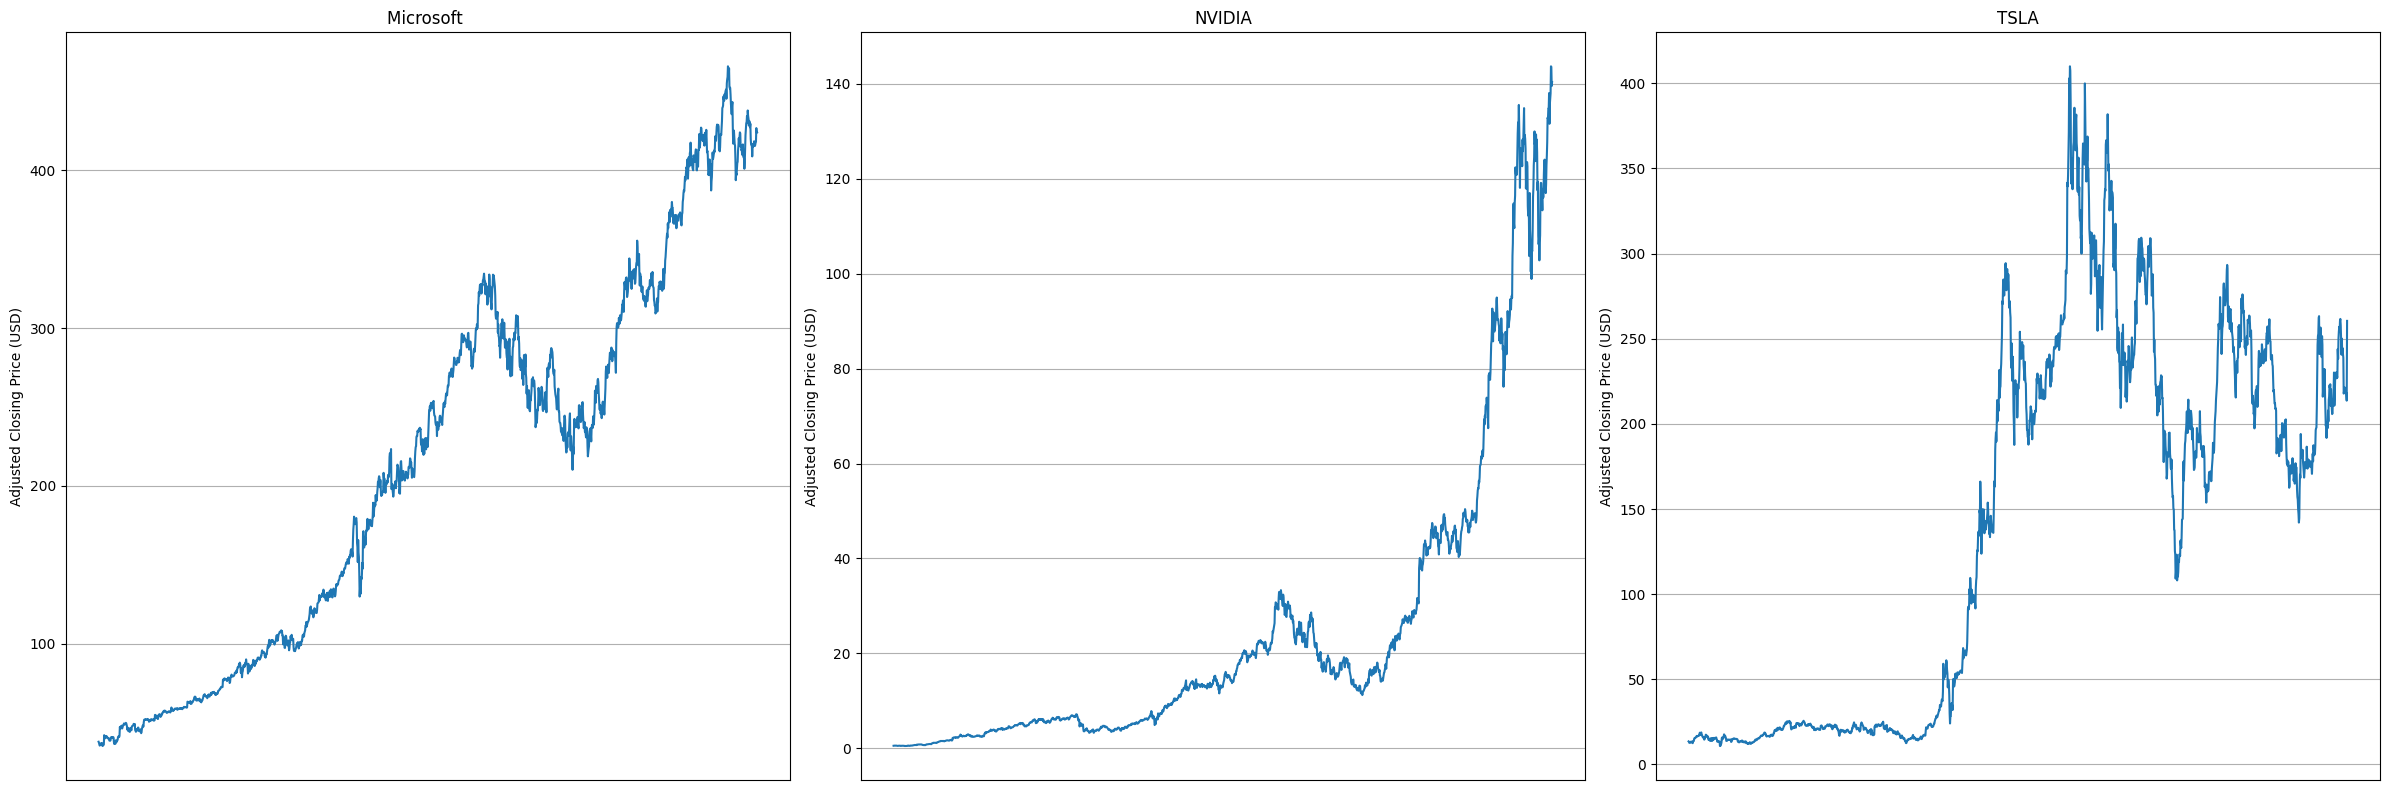

In [50]:
# Plot closing price over time
plt.figure(figsize = (24, 8))

plt.subplot(1, 3, 1)
plt.plot(MSFT['Adj Close'])
plt.title('Microsoft ')
plt.ylabel('Adjusted Closing Price (USD)')
plt.xticks([])
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(NVDA['Adj Close'])
plt.title('NVIDIA')
plt.ylabel('Adjusted Closing Price (USD)')
plt.xticks([])
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(TSLA['Adj Close'])
plt.title('TSLA')
plt.ylabel('Adjusted Closing Price (USD)')
plt.xticks([])
plt.grid(True)

plt.tight_layout()
plt.show()

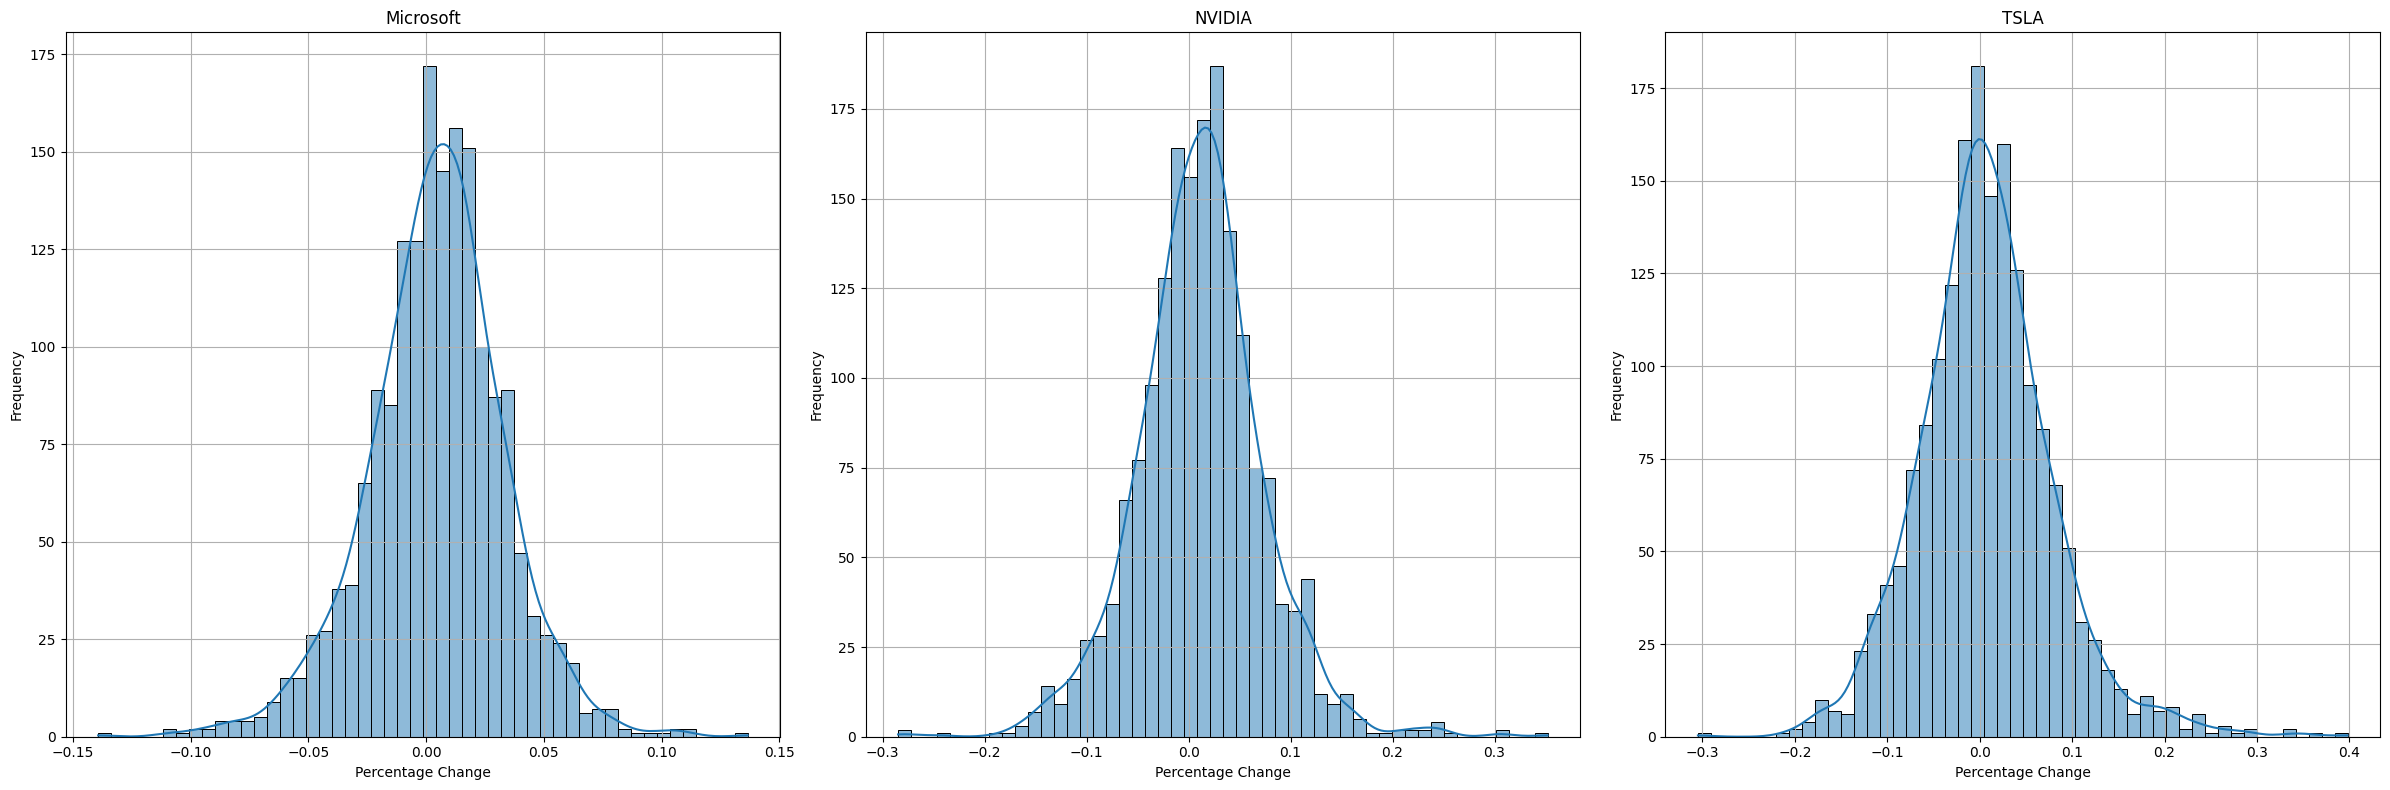

In [51]:
# Plot distribution of percentage change
plt.figure(figsize = (24, 8))

plt.subplot(1, 3, 1)
sns.histplot(MSFT['Percent Change'], bins = 50, kde = True, edgecolor = 'black')
plt.title('Microsoft')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.histplot(NVDA['Percent Change'], bins = 50, kde = True, edgecolor = 'black')
plt.title('NVIDIA')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.histplot(TSLA['Percent Change'], bins = 50, kde = True, edgecolor = 'black')
plt.title('TSLA')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

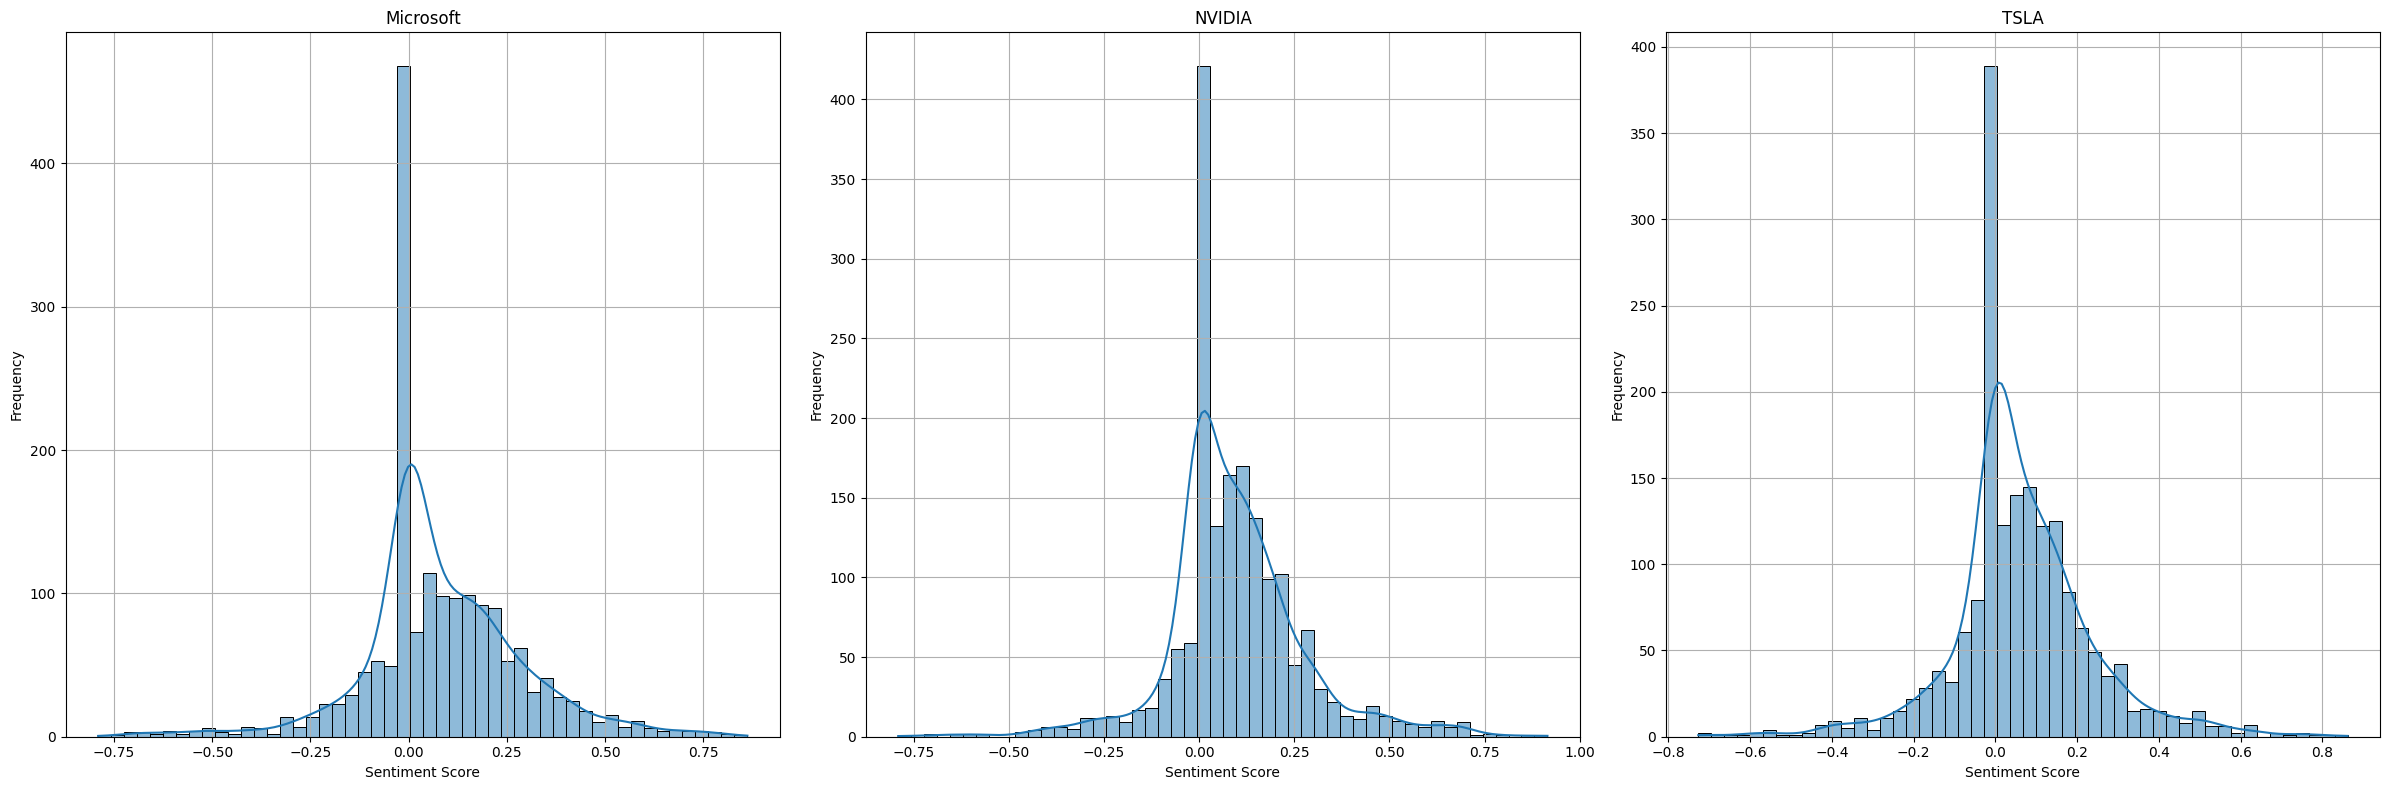

In [52]:
# Plot the distribution of sentiment scores
plt.figure(figsize = (24, 8))

plt.subplot(1, 3, 1)
sns.histplot(MSFT['Sentiment Score'], bins = 50, kde = True, edgecolor = 'black')
plt.title('Microsoft')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.histplot(NVDA['Sentiment Score'], bins = 50, kde = True, edgecolor = 'black')
plt.title('NVIDIA')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.histplot(TSLA['Sentiment Score'], bins = 50, kde = True, edgecolor = 'black')
plt.title('TSLA')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

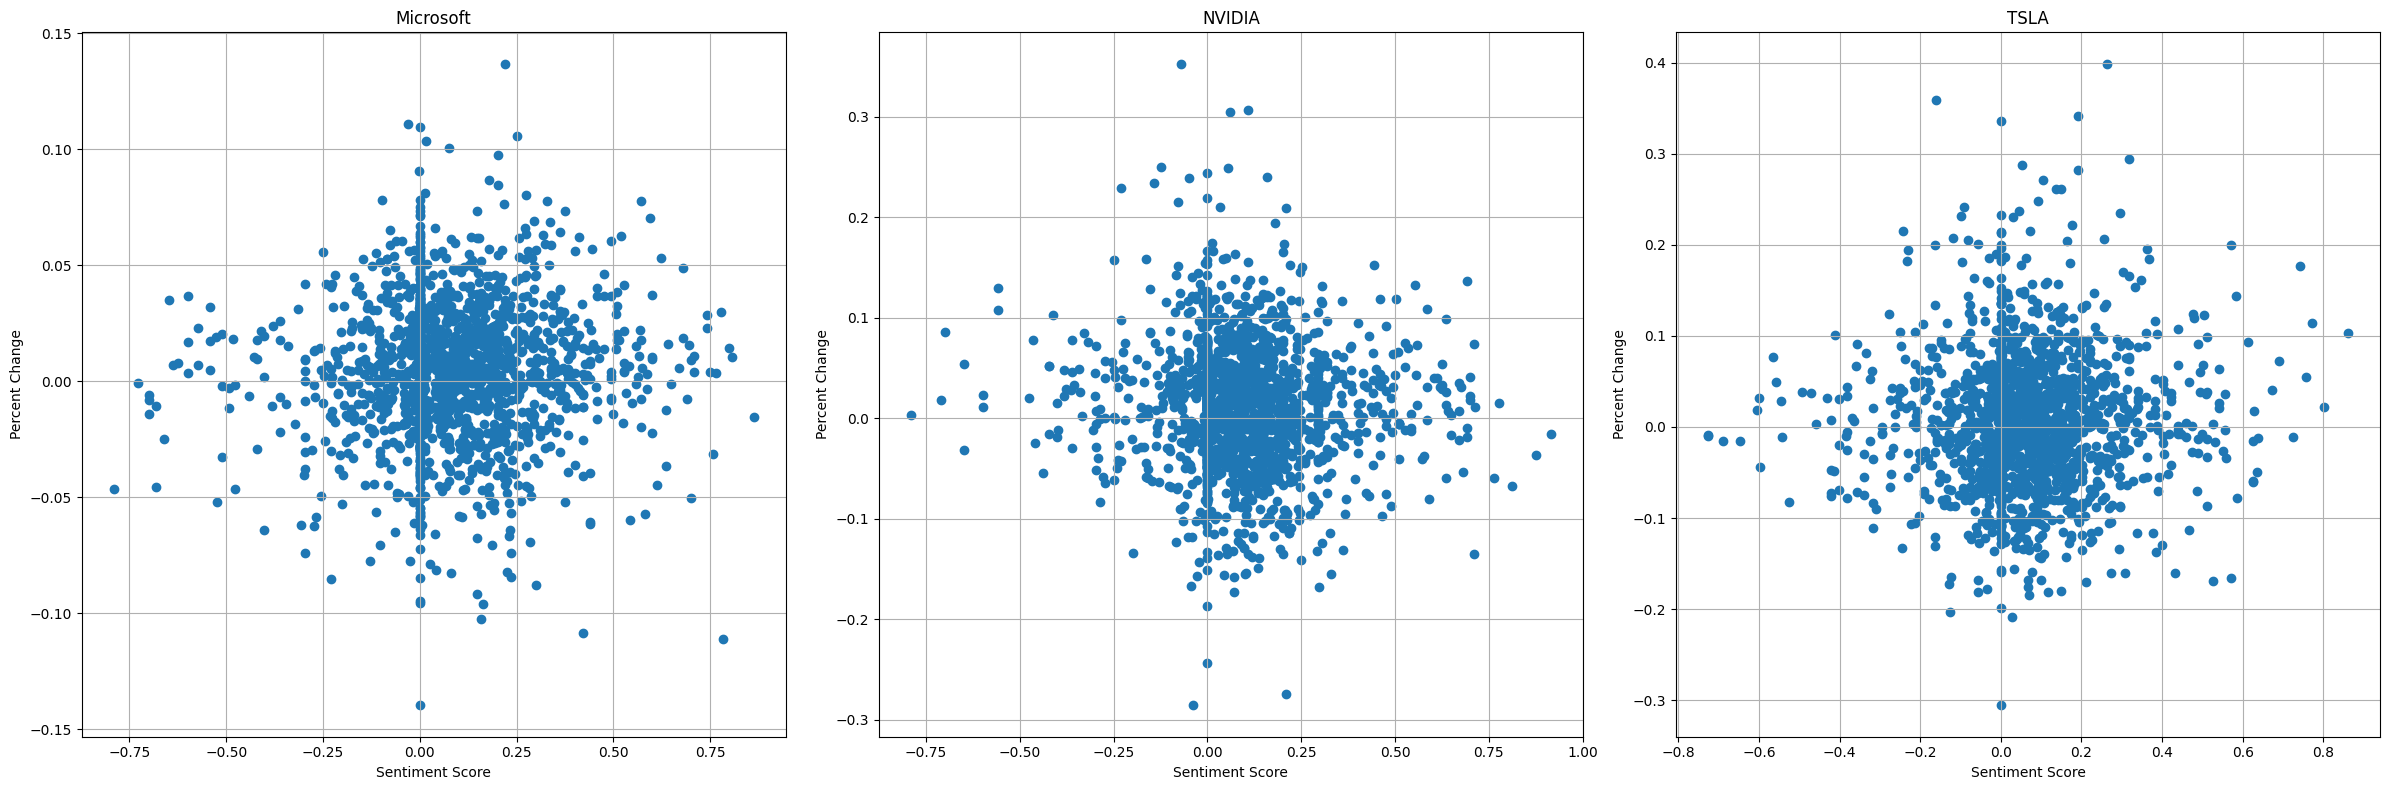

In [53]:
# Scatter plot of sentiment score against percent change
plt.figure(figsize = (24, 8))

plt.subplot(1, 3, 1)
plt.scatter(MSFT['Sentiment Score'], MSFT['Percent Change'])
plt.title('Microsoft')
plt.xlabel('Sentiment Score')
plt.ylabel('Percent Change')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(NVDA['Sentiment Score'], NVDA['Percent Change'])
plt.title('NVIDIA')
plt.xlabel('Sentiment Score')
plt.ylabel('Percent Change')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(TSLA['Sentiment Score'], TSLA['Percent Change'])
plt.title('TSLA')
plt.xlabel('Sentiment Score')
plt.ylabel('Percent Change')
plt.grid(True)

plt.tight_layout()
plt.show()

---

### Data Preparation 

---
1. Multi-Index for hierarchical indexing

In [54]:
# Set 'Date' and 'Company' as a MultiIndex for hierarchical indexing
stock_and_news_headline = stock_and_news_headline.sort_values(['Date', 'Company']).set_index(['Date', 'Company'])

In [55]:
stock_and_news_headline

Open        High         Low       Close  \
Date       Company                                                   
2015-02-27 MSFT      44.130001   44.200001   43.660000   43.849998   
           NVDA       0.553500    0.554750    0.549500    0.551500   
           TSLA      13.793333   13.903333   13.520000   13.556000   
2015-03-05 MSFT      43.070000   43.240002   42.820000   43.110001   
           NVDA       0.560750    0.572500    0.559250    0.571500   
...                        ...         ...         ...         ...   
2024-10-23 NVDA     142.029999  142.429993  137.460007  139.559998   
           TSLA     217.130005  218.720001  212.110001  213.649994   
2024-10-24 MSFT     425.329987  425.980011  422.399994  424.730011   
           NVDA     140.820007  141.350006  138.460007  140.410004   
           TSLA     244.679993  262.119995  242.649994  260.480011   

                     Adj Close     Volume         Mid  ClosePct      Range  \
Date       Company                                                           
2015-02-27 MSFT      37.921650   33807700   43.930000  0.351849   0.540001   
           NVDA       0.531541  157492000    0.552125  0.380956   0.005250   
           TSLA      13.556000   58231500   13.711667  0.093911   0.383332   
2015-03-05 MSFT      37.281685   23193500   43.030001  0.690475   0.420002   
           NVDA       0.550817  323056000    0.565875  0.924529   0.013250   
...                        ...        ...         ...       ...        ...   
2024-10-23 NVDA     139.559998  285930000  139.945000  0.422535   4.969986   
           TSLA     213.649994   80938900  215.415001  0.232979   6.610001   
2024-10-24 MSFT     423.881561   13581600  424.190002  0.650840   3.580017   
           NVDA     140.410004  172354900  139.905006  0.674740   2.889999   
           TSLA     260.480011  204491900  252.384995  0.915769  19.470001   

                     RangeMa  ...  CDivMa10  CDivMa30  MA10Slope  MA30Slope  \
Date       Company            ...                                             
2015-02-27 MSFT     0.769000  ...  1.000046  1.004122   0.076000  -0.070333   
           NVDA     0.011008  ...  0.992799  1.055166  -0.000600   0.001933   
           TSLA     0.453556  ...  0.983678  0.983929   0.003067   0.023667   
2015-03-05 MSFT     0.712667  ...  0.985754  0.995306  -0.039000  -0.093667   
           NVDA     0.011242  ...  1.023827  1.075950   0.001700   0.002133   
...                      ...  ...       ...       ...        ...        ...   
2024-10-23 NVDA     4.193666  ...  1.013662  1.102068   0.691000   0.755000   
           TSLA     7.687001  ...  0.967315  0.903437  -2.740001  -0.482667   
2024-10-24 MSFT     6.178332  ...  1.011065  1.002111   0.889001  -0.075666   
           NVDA     4.109666  ...  1.015705  1.102607   0.560001   0.709000   
           TSLA     8.082001  ...  1.167862  1.096721   2.171001   1.022334   

                    CPctChg10  CPctChg30  Percent Change  Sentiment Score  \
Date       Company                                                          
2015-02-27 MSFT      0.017637  -0.045910       -0.016876        -0.013580   
           NVDA     -0.010762   0.117528        0.036265         0.458800   
           TSLA      0.002267   0.055270       -0.013327         0.000000   
2015-03-05 MSFT     -0.008966  -0.061193       -0.026212         0.220767   
           NVDA      0.030658   0.126108        0.000875         0.000000   
...                       ...        ...             ...              ...   
2024-10-23 NVDA      0.052092   0.193739        0.012110         0.031310   
           TSLA     -0.113669  -0.063473        0.214697         0.072240   
2024-10-24 MSFT      0.021378  -0.005316        0.018365         0.121300   
           NVDA      0.041540   0.178529       -0.007621         0.135708   
           TSLA      0.090924   0.133458       -0.011249         0.055306   

                    Expected Change  Expected Change Value  
Date     

---
2. Split Data into Training and Testing sets

In [56]:
# Split the data into training and testing based on the date range
X = stock_and_news_headline.loc[:'2023-06-06']
y = stock_and_news_headline.loc['2023-06-07':]

In [57]:
# Prepare the X variables and y variable (without Sentiment Score)
X_train1 = X[['ClosePct', 'RangeZscore', 'CDivMa10', 'CDivMa30', 'MA10Slope', 'MA30Slope', 'CPctChg10', 'CPctChg30']]
X_test1 = y[['ClosePct', 'RangeZscore', 'CDivMa10', 'CDivMa30', 'MA10Slope', 'MA30Slope', 'CPctChg10', 'CPctChg30']]
y_train1 = X['Expected Change']
y_test1 = y['Expected Change']

In [58]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(4245, 8)
(1047, 8)
(4245,)
(1047,)


In [59]:
# Prepare the X variables and y variable (with Sentiment Score)
X_train2 = X[['ClosePct', 'RangeZscore', 'CDivMa10', 'CDivMa30', 'MA10Slope', 'MA30Slope', 'CPctChg10', 'CPctChg30', 'Sentiment Score']]
X_test2 = y[['ClosePct', 'RangeZscore', 'CDivMa10', 'CDivMa30', 'MA10Slope', 'MA30Slope', 'CPctChg10', 'CPctChg30', 'Sentiment Score']]
y_train2 = X['Expected Change']
y_test2 = y['Expected Change']

In [60]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(4245, 9)
(1047, 9)
(4245,)
(1047,)


---
3. Data Normalization 

In [61]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

In [62]:
# Fit and transform the X_train and X_test features
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [63]:
# Fit and transform the X_train and X_test features
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

---

### Stock Price Prediction - Without the Indicator 'Sentiment Score'

---
1. Logistic Regression

In [64]:
# Initialize the model
lr = LogisticRegression()

In [65]:
# Define the parameter grid
lr_parameter_grid = {'C': [0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2'],
                     'solver': ['liblinear', 'saga'],
                     'max_iter': [100, 200, 300]}

In [66]:
# Perform Grid Search
lr_grid_search = GridSearchCV(estimator = lr, param_grid = lr_parameter_grid, cv = 5, n_jobs = -1)
lr_grid_search.fit(X_train_scaled1, y_train1) # Fit the model

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [67]:
# Create a new model with the best parameters
best_lr_model = LogisticRegression(**lr_grid_search.best_params_)

In [68]:
# Train the model with the best parameters
best_lr_model.fit(X_train_scaled1, y_train1)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [69]:
# Make predictions
best_lr_train_predict = best_lr_model.predict(X_train_scaled1)

In [70]:
# Calculate accuracy score
best_lr_train_accuracy = accuracy_score(y_train1, best_lr_train_predict)
print("Train Accuracy:", best_lr_train_accuracy)

Train Accuracy: 0.567962308598351


In [71]:
# Make predictions
best_lr_test_predict = best_lr_model.predict(X_test_scaled1)

In [72]:
# Calculate accuracy score
best_lr_test_accuracy1 = accuracy_score(y_test1, best_lr_test_predict)
print("Test Accuracy:", best_lr_test_accuracy1)

Test Accuracy: 0.5549188156638013


In [73]:
# Classification Report
print(classification_report(y_test1, best_lr_test_predict))

              precision    recall  f1-score   support

    Decrease       0.45      0.02      0.04       464
    Increase       0.56      0.98      0.71       583

    accuracy                           0.55      1047
   macro avg       0.50      0.50      0.37      1047
weighted avg       0.51      0.55      0.41      1047



---
2. Decision Tree

In [74]:
# Initialize the model
dt = DecisionTreeClassifier()

In [75]:
# Define the parameter grid
dt_parameter_grid = {'max_depth': [3, 5, 10, None],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4],
                     'criterion': ['gini', 'entropy'],
                     'max_features': [None, 'sqrt', 'log2']}

In [76]:
# Perform Grid Search
dt_grid_search  = GridSearchCV(estimator = dt, param_grid = dt_parameter_grid, cv = 5, n_jobs = -1)
dt_grid_search.fit(X_train1, y_train1) # Fit the model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [77]:
# Create a new model with the best parameters
best_dt_model = DecisionTreeClassifier(**dt_grid_search.best_params_)

In [78]:
# Train the model with the best parameters
best_dt_model.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10)

In [79]:
# Make predictions
best_dt_train_predict = best_dt_model.predict(X_train1)

In [80]:
# Calculate accuracy score
best_dt_train_accuracy = accuracy_score(y_train1, best_dt_train_predict)
print("Train Accuracy:", best_dt_train_accuracy)

Train Accuracy: 0.5816254416961131


In [81]:
# Make predictions
best_dt_test_predict = best_dt_model.predict(X_test1)

In [82]:
# Calculate accuracy score
best_dt_test_accuracy1 = accuracy_score(y_test1, best_dt_test_predict)
print("Test Accuracy:", best_dt_test_accuracy1)

Test Accuracy: 0.5530085959885387


In [83]:
# Classification Report
print(classification_report(y_test1, best_dt_test_predict))

              precision    recall  f1-score   support

    Decrease       0.48      0.11      0.18       464
    Increase       0.56      0.91      0.69       583

    accuracy                           0.55      1047
   macro avg       0.52      0.51      0.43      1047
weighted avg       0.53      0.55      0.46      1047



---
3. Naive Bayes

In [84]:
# Initialize the model
nb = GaussianNB()

In [85]:
# Define the parameter grid
nb_parameter_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [86]:
# Perform Grid Search
nb_grid_search = GridSearchCV(estimator = nb, param_grid = nb_parameter_grid, cv = 5, n_jobs = -1)
nb_grid_search.fit(X_train1, y_train1) # Fit the model

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [87]:
# Create a new model with the best parameters
best_nb_model = GaussianNB(**nb_grid_search.best_params_)

In [88]:
# Train the model with the best parameters
best_nb_model.fit(X_train1, y_train1)

GaussianNB()

In [89]:
# Make predictions
best_nb_train_predict = best_nb_model.predict(X_train1)

In [90]:
# Calculate accuracy score
best_nb_train_accuracy = accuracy_score(y_train1, best_nb_train_predict)
print("Train Accuracy:", best_nb_train_accuracy)

Train Accuracy: 0.575736160188457


In [91]:
# Make predictions
best_nb_test_predict = best_nb_model.predict(X_test1)

In [92]:
# Calculate accuracy score
best_nb_test_accuracy1 = accuracy_score(y_test1, best_nb_test_predict)
print("Test Accuracy:", best_nb_test_accuracy1)

Test Accuracy: 0.542502387774594


In [93]:
# Classification Report
print(classification_report(y_test1, best_nb_test_predict))

              precision    recall  f1-score   support

    Decrease       0.47      0.24      0.32       464
    Increase       0.56      0.78      0.66       583

    accuracy                           0.54      1047
   macro avg       0.52      0.51      0.49      1047
weighted avg       0.52      0.54      0.51      1047



---
4. AdaBoost

In [94]:
# Initialize the model
ab = AdaBoostClassifier()

In [95]:
# Define the parameter grid
ab_parameter_grid = {'n_estimators': [50, 100, 200],
                     'learning_rate': [0.01, 0.1, 1, 10]}

In [96]:
# Perform Grid Search
ab_grid_search = GridSearchCV(estimator = ab, param_grid = ab_parameter_grid, cv = 5, n_jobs = -1)
ab_grid_search.fit(X_train1, y_train1) # Fit the model

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]})

In [97]:
# Create a new model with the best parameters
best_ab_model = AdaBoostClassifier(**ab_grid_search.best_params_)

In [98]:
# Train the model with the best parameters
best_ab_model.fit(X_train1, y_train1)

AdaBoostClassifier(learning_rate=10, n_estimators=100)

In [99]:
# Make predictions
best_ab_train_predict = best_ab_model.predict(X_train1)

In [100]:
# Calculate accuracy score
best_ab_train_accuracy = accuracy_score(y_train1, best_ab_train_predict)
print("Train Accuracy:", best_ab_train_accuracy)

Train Accuracy: 0.5736160188457008


In [101]:
# Make predictions
best_ab_test_predict = best_ab_model.predict(X_test1)

In [102]:
# Calculate accuracy score
best_ab_test_accuracy1 = accuracy_score(y_test1, best_ab_test_predict)
print("Test Accuracy:", best_ab_test_accuracy1)

Test Accuracy: 0.5587392550143266


In [103]:
# Classification Report
print(classification_report(y_test1, best_ab_test_predict))

              precision    recall  f1-score   support

    Decrease       0.51      0.12      0.20       464
    Increase       0.56      0.90      0.70       583

    accuracy                           0.56      1047
   macro avg       0.54      0.51      0.45      1047
weighted avg       0.54      0.56      0.48      1047



---
5. Voting

In [104]:
# Create a Voting Classifier
voting = VotingClassifier(estimators = [('Logistic Regression', best_lr_model),
                                        ('Decision Tree', best_dt_model),
                                        ('Naive Bayes', best_nb_model),
                                        ('AdaBoost', best_ab_model)],
                          voting = 'hard')

In [105]:
# Fit the model
voting.fit(X_train_scaled1, y_train1)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=10, penalty='l1',
                                                 solver='liblinear')),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('Naive Bayes', GaussianNB()),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=10,
                                                 n_estimators=100))])

In [106]:
# Make predictions
voting_train_predict = voting.predict(X_train_scaled1)

In [107]:
# Calculate accuracy score
voting_train_accuracy = accuracy_score(y_train1, voting_train_predict)
print("Train Accuracy:", voting_train_accuracy)

Train Accuracy: 0.5729093050647821


In [108]:
# Make predictions
voting_test_predict = voting.predict(X_test_scaled1)

In [109]:
# Calculate accuracy score
voting_test_accuracy1 = accuracy_score(y_test1, voting_test_predict)
print("Test Accuracy:", voting_test_accuracy1)

Test Accuracy: 0.5587392550143266


In [110]:
# Classification Report
print(classification_report(y_test1, voting_test_predict))

              precision    recall  f1-score   support

    Decrease       0.51      0.12      0.20       464
    Increase       0.56      0.91      0.70       583

    accuracy                           0.56      1047
   macro avg       0.54      0.51      0.45      1047
weighted avg       0.54      0.56      0.47      1047



---
6. Stacking

In [111]:
# Define base learners
base_learners = [('Logistic Regression', best_lr_model),
                 ('Decision Tree', best_dt_model),
                 ('Naive Bayes', best_nb_model),
                 ('AdaBoost', best_ab_model)]

In [112]:
# Define the meta-model
meta_model = best_nb_model

In [113]:
# Create a Stacking Classifier
stacking = StackingClassifier(estimators = base_learners, final_estimator = meta_model)

In [114]:
# Fit the model
stacking.fit(X_train_scaled1, y_train1)

StackingClassifier(estimators=[('Logistic Regression',
                                LogisticRegression(C=10, penalty='l1',
                                                   solver='liblinear')),
                               ('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=3,
                                                       max_features='log2',
                                                       min_samples_leaf=4,
                                                       min_samples_split=10)),
                               ('Naive Bayes', GaussianNB()),
                               ('AdaBoost',
                                AdaBoostClassifier(learning_rate=10,
                                                   n_estimators=100))],
                   final_estimator=GaussianNB())

In [115]:
# Make predictions
stacking_train_predict = stacking.predict(X_train_scaled1)

In [116]:
# Calculate accuracy score
stacking_train_accuracy = accuracy_score(y_train1, stacking_train_predict)
print("Train Accuracy:", stacking_train_accuracy)

Train Accuracy: 0.5743227326266196


In [117]:
# Make predictions
stacking_test_predict = stacking.predict(X_test_scaled1)

In [118]:
# Calculate accuracy score
stacking_test_accuracy1 = accuracy_score(y_test1, stacking_test_predict)
print("Test Accuracy:", stacking_test_accuracy1)

Test Accuracy: 0.5587392550143266


In [119]:
# Classification Report
print(classification_report(y_test1, stacking_test_predict))

              precision    recall  f1-score   support

    Decrease       0.51      0.11      0.17       464
    Increase       0.56      0.92      0.70       583

    accuracy                           0.56      1047
   macro avg       0.54      0.51      0.44      1047
weighted avg       0.54      0.56      0.47      1047



---
7. Accuracies Comparison

In [120]:
print("Logistic Regression Test Accuracy:", best_lr_test_accuracy1)
print("Decision Tree Test Accuracy:", best_dt_test_accuracy1)
print("Naive Bayes Test Accuracy:", best_nb_test_accuracy1)
print("AdaBoost Test Accuracy:", best_ab_test_accuracy1)
print("Voting Test Accuracy:", voting_test_accuracy1)
print("Stacking Test Accuracy:", stacking_test_accuracy1)

Logistic Regression Test Accuracy: 0.5549188156638013
Decision Tree Test Accuracy: 0.5530085959885387
Naive Bayes Test Accuracy: 0.542502387774594
AdaBoost Test Accuracy: 0.5587392550143266
Voting Test Accuracy: 0.5587392550143266
Stacking Test Accuracy: 0.5587392550143266


---

### Stock Price Prediction - With the Indicator 'Sentiment Score'

---
1. Logistic Regression

In [121]:
# Initialize the model
lr = LogisticRegression()

In [122]:
# Define the parameter grid
lr_parameter_grid = {'C': [0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2'],
                     'solver': ['liblinear', 'saga'],
                     'max_iter': [100, 200, 300]}

In [123]:
# Perform Grid Search
lr_grid_search = GridSearchCV(estimator = lr, param_grid = lr_parameter_grid, cv = 5, n_jobs = -1)
lr_grid_search.fit(X_train_scaled2, y_train2) # Fit the model

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [124]:
# Create a new model with the best parameters
best_lr_model = LogisticRegression(**lr_grid_search.best_params_)

In [125]:
# Train the model with the best parameters
best_lr_model.fit(X_train_scaled2, y_train2)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [126]:
# Make predictions
best_lr_train_predict = best_lr_model.predict(X_train_scaled2)

In [127]:
# Calculate accuracy score
best_lr_train_accuracy = accuracy_score(y_train2, best_lr_train_predict)
print("Train Accuracy:", best_lr_train_accuracy)

Train Accuracy: 0.5674911660777385


In [128]:
# Make predictions
best_lr_test_predict = best_lr_model.predict(X_test_scaled2)

In [129]:
# Calculate accuracy score
best_lr_test_accuracy2 = accuracy_score(y_test2, best_lr_test_predict)
print("Test Accuracy:", best_lr_test_accuracy2)

Test Accuracy: 0.556829035339064


In [130]:
# Classification Report
print(classification_report(y_test2, best_lr_test_predict))

              precision    recall  f1-score   support

    Decrease       0.00      0.00      0.00       464
    Increase       0.56      1.00      0.72       583

    accuracy                           0.56      1047
   macro avg       0.28      0.50      0.36      1047
weighted avg       0.31      0.56      0.40      1047



---
2. Decision Tree

In [131]:
# Initialize the model
dt = DecisionTreeClassifier()

In [132]:
# Define the parameter grid
dt_parameter_grid = {'max_depth': [3, 5, 10, None],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4],
                     'criterion': ['gini', 'entropy'],
                     'max_features': [None, 'sqrt', 'log2']}

In [133]:
# Perform Grid Search
dt_grid_search  = GridSearchCV(estimator = dt, param_grid = dt_parameter_grid, cv = 5, n_jobs = -1)
dt_grid_search.fit(X_train2, y_train2) # Fit the model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [134]:
# Create a new model with the best parameters
best_dt_model = DecisionTreeClassifier(**dt_grid_search.best_params_)

In [135]:
# Train the model with the best parameters
best_dt_model.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

In [136]:
# Make predictions
best_dt_train_predict = best_dt_model.predict(X_train2)

In [137]:
# Calculate accuracy score
best_dt_train_accuracy = accuracy_score(y_train2, best_dt_train_predict)
print("Train Accuracy:", best_dt_train_accuracy)

Train Accuracy: 0.5858657243816254


In [138]:
# Make predictions
best_dt_test_predict = best_dt_model.predict(X_test2)

In [139]:
# Calculate accuracy score
best_dt_test_accuracy2 = accuracy_score(y_test2, best_dt_test_predict)
print("Test Accuracy:", best_dt_test_accuracy2)

Test Accuracy: 0.5644699140401146


In [140]:
# Classification Report
print(classification_report(y_test2, best_dt_test_predict))

              precision    recall  f1-score   support

    Decrease       0.53      0.15      0.23       464
    Increase       0.57      0.89      0.70       583

    accuracy                           0.56      1047
   macro avg       0.55      0.52      0.47      1047
weighted avg       0.55      0.56      0.49      1047



---
3. Naive Bayes

In [141]:
# Initialize the model
nb = GaussianNB()

In [142]:
# Define the parameter grid
nb_parameter_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [143]:
# Perform Grid Search
nb_grid_search = GridSearchCV(estimator = nb, param_grid = nb_parameter_grid, cv = 5, n_jobs = -1)
nb_grid_search.fit(X_train2, y_train2) # Fit the model

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [144]:
# Create a new model with the best parameters
best_nb_model = GaussianNB(**nb_grid_search.best_params_)

In [145]:
# Train the model with the best parameters
best_nb_model.fit(X_train2, y_train2)

GaussianNB(var_smoothing=1e-05)

In [146]:
# Make predictions
best_nb_train_predict = best_nb_model.predict(X_train2)

In [147]:
# Calculate accuracy score
best_nb_train_accuracy = accuracy_score(y_train2, best_nb_train_predict)
print("Train Accuracy:", best_nb_train_accuracy)

Train Accuracy: 0.5743227326266196


In [148]:
# Make predictions
best_nb_test_predict = best_nb_model.predict(X_test2)

In [149]:
# Calculate accuracy score
best_nb_test_accuracy2 = accuracy_score(y_test2, best_nb_test_predict)
print("Test Accuracy:", best_nb_test_accuracy2)

Test Accuracy: 0.5463228271251194


In [150]:
# Classification Report
print(classification_report(y_test2, best_nb_test_predict))

              precision    recall  f1-score   support

    Decrease       0.48      0.27      0.34       464
    Increase       0.57      0.77      0.65       583

    accuracy                           0.55      1047
   macro avg       0.52      0.52      0.50      1047
weighted avg       0.53      0.55      0.52      1047



---
4. AdaBoost

In [151]:
# Initialize the model
ab = AdaBoostClassifier()

In [152]:
# Define the parameter grid
ab_parameter_grid = {'n_estimators': [50, 100, 200],
                     'learning_rate': [0.01, 0.1, 1, 10]}

In [153]:
# Perform Grid Search
ab_grid_search = GridSearchCV(estimator = ab, param_grid = ab_parameter_grid, cv = 5, n_jobs = -1)
ab_grid_search.fit(X_train2, y_train2) # Fit the model

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]})

In [154]:
# Create a new model with the best parameters
best_ab_model = AdaBoostClassifier(**ab_grid_search.best_params_)

In [155]:
# Train the model with the best parameters
best_ab_model.fit(X_train2, y_train2)

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [156]:
# Make predictions
best_ab_train_predict = best_ab_model.predict(X_train2)

In [157]:
# Calculate accuracy score
best_ab_train_accuracy = accuracy_score(y_train2, best_ab_train_predict)
print("Train Accuracy:", best_ab_train_accuracy)

Train Accuracy: 0.5738515901060071


In [158]:
# Make predictions
best_ab_test_predict = best_ab_model.predict(X_test2)

In [159]:
# Calculate accuracy score
best_ab_test_accuracy2 = accuracy_score(y_test2, best_ab_test_predict)
print("Test Accuracy:", best_ab_test_accuracy2)

Test Accuracy: 0.5587392550143266


In [160]:
# Classification Report
print(classification_report(y_test2, best_ab_test_predict))

              precision    recall  f1-score   support

    Decrease       0.52      0.06      0.11       464
    Increase       0.56      0.95      0.71       583

    accuracy                           0.56      1047
   macro avg       0.54      0.51      0.41      1047
weighted avg       0.54      0.56      0.44      1047



---
5. Voting

In [161]:
# Create a Voting Classifier
voting = VotingClassifier(estimators = [('Logistic Regression', best_lr_model),
                                        ('Decision Tree', best_dt_model),
                                        ('Naive Bayes', best_nb_model),
                                        ('AdaBoost', best_ab_model)],
                          voting = 'hard')

In [162]:
# Fit the model
voting.fit(X_train_scaled2, y_train2)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, penalty='l1',
                                                 solver='liblinear')),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_features='log2',
                                                     min_samples_leaf=2,
                                                     min_samples_split=5)),
                             ('Naive Bayes', GaussianNB(var_smoothing=1e-05)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=0.01,
                                                 n_estimators=200))])

In [163]:
# Make predictions
voting_train_predict = voting.predict(X_train_scaled2)

In [164]:
# Calculate accuracy score
voting_train_accuracy = accuracy_score(y_train2, voting_train_predict)
print("Train Accuracy:", voting_train_accuracy)

Train Accuracy: 0.5740871613663133


In [165]:
# Make predictions
voting_test_predict = voting.predict(X_test_scaled2)

In [166]:
# Calculate accuracy score
voting_test_accuracy2 = accuracy_score(y_test2, voting_test_predict)
print("Test Accuracy:", voting_test_accuracy2)

Test Accuracy: 0.5558739255014327


In [167]:
# Classification Report
print(classification_report(y_test2, voting_test_predict))

              precision    recall  f1-score   support

    Decrease       0.49      0.06      0.11       464
    Increase       0.56      0.95      0.70       583

    accuracy                           0.56      1047
   macro avg       0.53      0.51      0.41      1047
weighted avg       0.53      0.56      0.44      1047



---
6. Stacking

In [168]:
# Define base learners
base_learners = [('Logistic Regression', best_lr_model),
                 ('Decision Tree', best_dt_model),
                 ('Naive Bayes', best_nb_model),
                 ('AdaBoost', best_ab_model)]

In [169]:
# Define the meta-model
meta_model = best_nb_model

In [170]:
# Create a Stacking Classifier
stacking = StackingClassifier(estimators = base_learners, final_estimator = meta_model)

In [171]:
# Fit the model
stacking.fit(X_train_scaled2, y_train2)

StackingClassifier(estimators=[('Logistic Regression',
                                LogisticRegression(C=0.1, penalty='l1',
                                                   solver='liblinear')),
                               ('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_features='log2',
                                                       min_samples_leaf=2,
                                                       min_samples_split=5)),
                               ('Naive Bayes', GaussianNB(var_smoothing=1e-05)),
                               ('AdaBoost',
                                AdaBoostClassifier(learning_rate=0.01,
                                                   n_estimators=200))],
                   final_estimator=GaussianNB(var_smoothing=1e-05))

In [172]:
# Make predictions
stacking_train_predict = stacking.predict(X_train_scaled2)

In [173]:
# Calculate accuracy score
stacking_train_accuracy = accuracy_score(y_train2, stacking_train_predict)
print("Train Accuracy:", stacking_train_accuracy)

Train Accuracy: 0.5752650176678445


In [174]:
# Make predictions
stacking_test_predict = stacking.predict(X_test_scaled2)

In [175]:
# Calculate accuracy score
stacking_test_accuracy2 = accuracy_score(y_test2, stacking_test_predict)
print("Test Accuracy:", stacking_test_accuracy2)

Test Accuracy: 0.5673352435530086


In [176]:
# Classification Report
print(classification_report(y_test2, stacking_test_predict))

              precision    recall  f1-score   support

    Decrease       0.60      0.07      0.13       464
    Increase       0.57      0.96      0.71       583

    accuracy                           0.57      1047
   macro avg       0.58      0.52      0.42      1047
weighted avg       0.58      0.57      0.45      1047



---
7. Accuracies Comparison

In [177]:
print("Logistic Regression Test Accuracy:", best_lr_test_accuracy2)
print("Decision Tree Test Accuracy:", best_dt_test_accuracy2)
print("Naive Bayes Test Accuracy:", best_nb_test_accuracy2)
print("AdaBoost Test Accuracy:", best_ab_test_accuracy2)
print("Voting Test Accuracy:", voting_test_accuracy2)
print("Stacking Test Accuracy:", stacking_test_accuracy2)

Logistic Regression Test Accuracy: 0.556829035339064
Decision Tree Test Accuracy: 0.5644699140401146
Naive Bayes Test Accuracy: 0.5463228271251194
AdaBoost Test Accuracy: 0.5587392550143266
Voting Test Accuracy: 0.5558739255014327
Stacking Test Accuracy: 0.5673352435530086


---

### Analysis of the Result

---
1. Change in Predictive Power

In [178]:
print("Change in Logistic Regression Test Accuracy:", best_lr_test_accuracy2 - best_lr_test_accuracy1)
print("Change in Decision Tree Test Accuracy:", best_dt_test_accuracy2 - best_dt_test_accuracy1)
print("Change in Naive Bayes Test Accuracy:", best_nb_test_accuracy2 - best_nb_test_accuracy1)
print("Change in AdaBoost Test Accuracy:", best_ab_test_accuracy2 - best_ab_test_accuracy1)
print("Change in Voting Test Accuracy:", voting_test_accuracy2 - voting_test_accuracy1)
print("Change in Stacking Test Accuracy:", stacking_test_accuracy2 - stacking_test_accuracy1)

Change in Logistic Regression Test Accuracy: 0.0019102196752627254
Change in Decision Tree Test Accuracy: 0.011461318051575908
Change in Naive Bayes Test Accuracy: 0.00382043935052534
Change in AdaBoost Test Accuracy: 0.0
Change in Voting Test Accuracy: -0.002865329512893977
Change in Stacking Test Accuracy: 0.008595988538681931


---
2. P-Value Test

In [179]:
# Prepare the X variable and y variable
X = stock_and_news_headline['Sentiment Score']
y = stock_and_news_headline['Expected Change Value']

In [180]:
# Add a constant
X = sm.add_constant(X)

In [181]:
# Fit an Ordinary Least Squares regression model
ols = sm.OLS(y, X).fit()

In [182]:
print(ols.summary())

                              OLS Regression Results                             
Dep. Variable:     Expected Change Value   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     3.943
Date:                   Thu, 21 Nov 2024   Prob (F-statistic):             0.0471
Time:                           22:32:33   Log-Likelihood:                -3793.3
No. Observations:                   5292   AIC:                             7591.
Df Residuals:                       5290   BIC:                             7604.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       